# PART ONE

In [1]:
import zipfile as zf
trainZipFile = zf.ZipFile("train.zip")
trainZipFile.extractall()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import os
import cv2
from glob import glob
from sklearn.preprocessing import LabelBinarizer

In [3]:
#read images
images = []
labels = []
for folderName in os.listdir("train"):
    folderPath = os.path.join("train", folderName)
    classLabel = folderName
    
    for imagePath in glob(os.path.join(folderPath, "*.png")):
        imagebgr = cv2.imread(imagePath, cv2.IMREAD_COLOR)
        if imagebgr is None:
            continue
        images.append(imagebgr)
        labels.append(classLabel)

In [4]:
#resize images
def resizeImage(img):
    img = np.array(img).astype(np.uint8)
    resized = cv2.resize(img,(256,256),interpolation = cv2.INTER_CUBIC)
    return resized

In [5]:
images = [resizeImage(img) for img in images]

In [6]:
images = np.array(images)
labels = np.array(labels)
values = []
classes = []
for label in set(labels):
    values.append(len(images[labels == label]))
    classes.append(label)

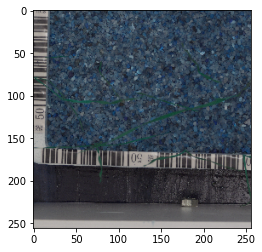

In [7]:
plt.imshow(images[10])

In [8]:
#label encoder
enc = LabelBinarizer()
y = enc.fit_transform(labels)

In [9]:
#Split data into test and train data from training dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3)

In [10]:
#create validation set from test dataset
random_seed = 2
X_test, X_val, y_test, Y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=random_seed)

In [11]:
#train using neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(12, activation="softmax"))
model

In [12]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

# Fit the model
model.fit(x=X_train, y=y_train, batch_size=32, epochs=10, validation_data=(X_val, Y_val))

Train on 3336 samples, validate on 716 samples
Epoch 1/10
3336/3336 [==============================] - 11s 3ms/sample - loss: 109565648.4855 - accuracy: 0.1268 - val_loss: 2.4764 - val_accuracy: 0.0992
Epoch 2/10
3336/3336 [==============================] - 10s 3ms/sample - loss: 2.4872 - accuracy: 0.1307 - val_loss: 2.4681 - val_accuracy: 0.1564
Epoch 3/10
3336/3336 [==============================] - 10s 3ms/sample - loss: 2.4591 - accuracy: 0.1409 - val_loss: 2.4613 - val_accuracy: 0.1564
Epoch 4/10
3336/3336 [==============================] - 10s 3ms/sample - loss: 2.4511 - accuracy: 0.1409 - val_loss: 2.4557 - val_accuracy: 0.1564
Epoch 5/10
3336/3336 [==============================] - 10s 3ms/sample - loss: 2.4445 - accuracy: 0.1409 - val_loss: 2.4511 - val_accuracy: 0.1564
Epoch 6/10
3336/3336 [==============================] - 10s 3ms/sample - loss: 2.4388 - accuracy: 0.1409 - val_loss: 2.4474 - val_accuracy: 0.1564
Epoch 7/10
3336/3336 [==============================] - 10s 3ms

In [13]:
#test
model.evaluate(X_test, y_test)

715/715 [==============================] - 1s 1ms/sample - loss: 2.4281 - accuracy: 0.1245


[2.4280971657146107, 0.124475524]

In [14]:
#Train using CNN
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
from keras.optimizers import Adam
CNNModel = Sequential()
batch_size = None
CNNModel.add(Conv2D(filters = 32, kernel_size = (5,5), 
                 activation ='relu', batch_input_shape = (batch_size,256, 256, 3)))


CNNModel.add(Conv2D(filters = 32, kernel_size = (5,5), 
                 activation ='relu'))
CNNModel.add(MaxPool2D(pool_size=(2,2)))
CNNModel.add(Dropout(0.2))


CNNModel.add(Conv2D(filters = 64, kernel_size = (3,3), 
                 activation ='relu'))
CNNModel.add(Conv2D(filters = 64, kernel_size = (3,3), 
                 activation ='relu'))
CNNModel.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
CNNModel.add(Dropout(0.3))

CNNModel.add(Conv2D(filters = 128, kernel_size = (3,3),
                 activation ='relu'))
CNNModel.add(Conv2D(filters = 128, kernel_size = (3,3), 
                 activation ='relu'))
CNNModel.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
CNNModel.add(Dropout(0.4))

CNNModel.add(GlobalMaxPooling2D())
CNNModel.add(Dense(256, activation = "relu"))
CNNModel.add(Dropout(0.5))
CNNModel.add(Dense(12, activation = "softmax"))
CNNModel.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 252, 252, 32)      2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 248, 248, 32)      25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 124, 124, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 120, 120, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 60, 60, 64)       

In [15]:
opt = Adam(lr=0.001)

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
CNNModel.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [16]:
#keeping epochs as 5 to save computing time as it took around 12 minutes to complete one epoch
CNNModel.fit(X_train, y_train, epochs = 5, validation_data = (X_val,Y_val))

Train on 3336 samples, validate on 716 samples
Epoch 1/5
3336/3336 [==============================] - 1000s 300ms/step - loss: 3.6129 - accuracy: 0.1331 - val_loss: 2.4563 - val_accuracy: 0.1313
Epoch 2/5
3336/3336 [==============================] - 887s 266ms/step - loss: 2.4748 - accuracy: 0.1337 - val_loss: 2.4384 - val_accuracy: 0.1411
Epoch 3/5
3336/3336 [==============================] - 745s 223ms/step - loss: 2.4042 - accuracy: 0.1607 - val_loss: 2.4210 - val_accuracy: 0.1550
Epoch 4/5
3336/3336 [==============================] - 775s 232ms/step - loss: 2.2359 - accuracy: 0.2410 - val_loss: 2.2319 - val_accuracy: 0.2696
Epoch 5/5
3336/3336 [==============================] - 769s 231ms/step - loss: 2.1800 - accuracy: 0.2755 - val_loss: 2.1428 - val_accuracy: 0.2570


In [19]:
#pickle CNN model
import pickle
filename = 'cnnmodel.sav'
pickle.dump(CNNModel, open(filename, 'wb'))

In [20]:
testZipFile = zf.ZipFile("test.zip")
testZipFile.extractall()

In [21]:
#read images
testimages = []
path = "C:/Users/mugdha/Downloads/test"
    
for imagePath in glob(os.path.join(folderPath, "*.png")):
    testimagebgr = cv2.imread(imagePath, cv2.IMREAD_COLOR)
    if testimagebgr is None:
        continue
    testimages.append(testimagebgr)

In [22]:
testimages = [resizeImage(testimg) for testimg in testimages]

In [23]:
testimages = np.array(testimages)

In [24]:
ynew = model.predict_classes(testimages)

In [25]:
cnnynew = CNNModel.predict_classes(testimages)

# PART TWO

CNN performs better than neural networks as CNN has lesser number of units, which means that it can itself learn the important features without the user having to explicitly tell what are the main features. This also reduces the chances of overfitting in CNN. As we can see from the epochs for both neural network and CNN, CNN gets to a better result faster compared to neural network.

# PART THREE - done at the end

# PART FOUR

In [26]:
import tflearn.datasets.oxflower17 as oxflower17

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [27]:
X, Y = oxflower17.load_data(one_hot=True)
np.savez_compressed('oxflower17', X=X, Y=Y)

In [28]:
p4_data = np.load('oxflower17.npz')

In [29]:
os.listdir("17flowers")

['17flowers.pkl', '17flowers.tgz', 'jpg']

In [30]:
#read images
p4images = []
p4labels = []
for folderName in os.listdir("17flowers/jpg"):
    folderPath = os.path.join("17flowers/jpg", folderName)
    classLabel = folderName
    
    for imagePath in glob(os.path.join(folderPath, "*.jpg")):
        imagebgr = cv2.imread(imagePath, cv2.IMREAD_COLOR)
        if imagebgr is None:
            continue
        p4images.append(imagebgr)
        p4labels.append(classLabel)

In [31]:
#Resize images (preprocessing)
p4images = [resizeImage(img) for img in p4images]

In [32]:
p4images = np.array(p4images)
p4labels = np.array(p4labels)

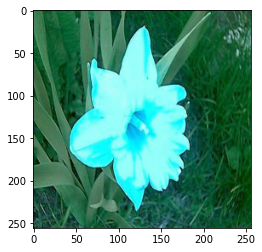

In [33]:
plt.imshow(p4images[17])

In [34]:
def createMask(img):
    hsvImage = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(hsvImage, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segImage(img):
    mask = createMask(img)
    output = cv2.bitwise_and(img, img, mask = mask)
    return output

def sharpenImage(img):
    blurImage = cv2.GaussianBlur(img, (0, 0), 3)
    sharpImage = cv2.addWeighted(img, 1.5, blurImage, -0.5, 0)
    return sharpImage

def segment(img):

  segmentImage = segImage(img)
  sharpenedImage = sharpenImage(segmentImage)
  return sharpenedImage

In [35]:
for indx, image in enumerate(p4images):
    p4images[indx] = segment(image)

In [36]:
enc = LabelBinarizer()
p4y = enc.fit_transform(p4labels)

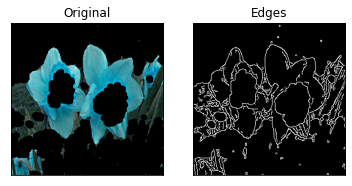

In [37]:
#edge detection on one image
img = p4images[0]
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edges'), plt.xticks([]), plt.yticks([])

plt.show()

In [38]:
#Split data into train and test datasets
p4train, p4test, p4trainlabels, p4testlabels = train_test_split(p4images, p4y, train_size = 0.8, random_state =  104)

In [39]:
#training using neural networks
p4nnmodel = Sequential()
p4nnmodel.add(Flatten())
p4nnmodel.add(Dense(128, activation="relu"))
p4nnmodel.add(Dense(17, activation="softmax"))

In [40]:
# Compile the model
p4nnmodel.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

# Fit the model
p4nnmodel.fit(x=p4train, y=p4trainlabels, batch_size=32, epochs=10)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Epoch 1/10
1088/1088 [==============================] - 6s 5ms/step - loss: 47150068.9039 - accuracy: 0.0607
Epoch 2/10
1088/1088 [==============================] - 6s 5ms/step - loss: 132.4404 - accuracy: 0.0561
Epoch 3/10
1088/1088 [==============================] - 6s 5ms/step - loss: 10708.2909 - accuracy: 0.0607
Epoch 4/10
1088/1088 [==============================] - 6s 5ms/step - loss: 15.3990 - accuracy: 0.0708
Epoch 5/10
1088/1088 [==============================] - 6s 5ms/step - loss: 2.9703 - accuracy: 0.0634
Epoch 6/10
1088/1088 [==============================] - 6s 5ms/step - loss: 2.8197 - accuracy: 0.0643
Epoch 7/10
1088/1088 [==============================] - 6s 5ms/step - loss: 2.8146 - accuracy: 0.0643
Epoch 8/10
1088/1088 [==============================] - 6s 5ms/step - loss: 2.8106 - accuracy: 0.0634
Epoch 9/10
1088/1088 [==============================] - 6s 5ms/step - loss: 2.8094 - accu

In [41]:
#test
p4nnmodel.evaluate(p4test, p4testlabels)

272/272 [==============================] - 0s 1ms/step


[408.13276115585774, 0.04411764815449715]

In [42]:
#train using CNN
p4CNNmodel = Sequential()
batch_size = None
p4CNNmodel.add(Conv2D(filters = 32, kernel_size = (5,5), 
                 activation ='relu', batch_input_shape = (batch_size,256, 256, 3)))


p4CNNmodel.add(Conv2D(filters = 32, kernel_size = (5,5), 
                 activation ='relu'))
p4CNNmodel.add(MaxPool2D(pool_size=(2,2)))
p4CNNmodel.add(Dropout(0.2))


p4CNNmodel.add(Conv2D(filters = 64, kernel_size = (3,3), 
                 activation ='relu'))
p4CNNmodel.add(Conv2D(filters = 64, kernel_size = (3,3), 
                 activation ='relu'))
p4CNNmodel.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
p4CNNmodel.add(Dropout(0.3))

p4CNNmodel.add(Conv2D(filters = 128, kernel_size = (3,3),
                 activation ='relu'))
p4CNNmodel.add(Conv2D(filters = 128, kernel_size = (3,3), 
                 activation ='relu'))
p4CNNmodel.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
p4CNNmodel.add(Dropout(0.4))

p4CNNmodel.add(GlobalMaxPooling2D())
p4CNNmodel.add(Dense(256, activation = "relu"))
p4CNNmodel.add(Dropout(0.5))
p4CNNmodel.add(Dense(17, activation = "softmax"))
p4CNNmodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 252, 252, 32)      2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 248, 248, 32)      25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 124, 124, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 120, 120, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 60, 60, 64)       

In [43]:
opt = Adam(lr=0.001)

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
p4CNNmodel.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [44]:
p4CNNmodel.fit(p4train, p4trainlabels, epochs = 5)

Epoch 1/5
1088/1088 [==============================] - 256s 235ms/step - loss: 6.5030 - accuracy: 0.0616
Epoch 2/5
1088/1088 [==============================] - 257s 237ms/step - loss: 2.8592 - accuracy: 0.0699
Epoch 3/5
1088/1088 [==============================] - 256s 235ms/step - loss: 2.8225 - accuracy: 0.0790
Epoch 4/5
1088/1088 [==============================] - 259s 238ms/step - loss: 2.7597 - accuracy: 0.1020
Epoch 5/5
 640/1088 [================>.............] - ETA: 1:46 - loss: 2.6554 - accuracy: 0.1234

KeyboardInterrupt: 

In [45]:
score = p4CNNmodel.evaluate(p4test, p4testlabels, verbose=0, batch_size = 38)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.7513522418106304
Test accuracy: 0.08088235557079315


#PART 5 - GUI

In [ ]:
#GUI
import tkinter as tk
from tkinter import ttk
import pandas as pd
import re

win = tk.Tk()
win.title('Assignment GUI')

Name = ttk.Label(win,text = "Step 1: File Name")
Name.grid(row = 0, column = 0, sticky = tk.W)
Name_var = tk.StringVar()
Name_entrybox = ttk.Entry(win,width=16,textvariable = Name_var)
Name_entrybox.grid(row=0,column=1)

def ImportData(tkimg):
    image_name = Name_var.get()
    path = "C:/Users/mugdha/Downloads/17flowers/jpg/"
    imgpath = path + image_name + ".jpg"
    tkimg = cv2.imread(imgpath, cv2.IMREAD_COLOR)
    confirm = "Done"
    confirm_entrybox = ttk.Entry(win, width = 16)
    confirm_entrybox.grid(row=0,column=3)
    confirm_entrybox.insert(1,str(confirm))
Import_data_button = ttk.Button(win,text = "Import Data", command = lambda: ImportData(tkimg))
Import_data_button.grid(row = 0, column = 2)

classifierLabel = ttk.Label(win,text = "Image classifier")
classifierLabel.grid(row = 1, column = 0, sticky = tk.W)

def predictClass():
    image_name = Name_var.get()
    path = "C:/Users/mugdha/Downloads/17flowers/jpg/"
    imgpath = path + image_name + ".jpg"
    tkimg = cv2.imread(imgpath, cv2.IMREAD_COLOR)
    tkimg = resizeImage(tkimg)
    tkimg = np.array(tkimg)
    tkimg = segment(tkimg)
    tkimg = np.expand_dims(tkimg, axis=0)
    classpredicted = p4CNNmodel.predict_classes(tkimg)
    result_entrybox = ttk.Entry(win, width = 16)
    result_entrybox.grid(row=2,column=3)
    result_entrybox.insert(1,str(classpredicted))

Predict_button = ttk.Button(win,text = "Predict", command = predictClass)
Predict_button.grid(row = 2, column = 2)
    
win.mainloop()

# PART THREE

In [46]:
df = pd.read_csv('labels.csv')
imageArr = pd.DataFrame(df['image'])
classArr = pd.DataFrame(df['class'])
classArr.to_numpy()

array([['class1'],
       ['class1'],
       ['class2'],
       ['class1'],
       ['class2'],
       ['class1'],
       ['class2'],
       ['class1'],
       ['class1'],
       ['class3'],
       ['class1'],
       ['class3'],
       ['class1'],
       ['class3'],
       ['class1']], dtype=object)

In [47]:
#read images
p3images = []
p3labels = []
path = "C:/Users/mugdha/Downloads/Cars Images"
i = 0
for imagePath in glob(os.path.join(path, "*.jpg")):
    p3imagebgr = cv2.imread(imagePath, cv2.IMREAD_COLOR)
    p3images.append(p3imagebgr)
    p3labels.append(classArr[i:i+1])
    i = i + 1

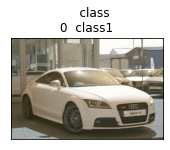

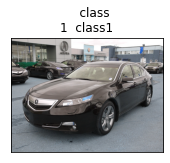

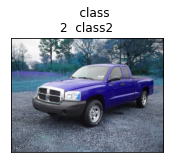

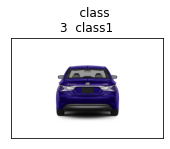

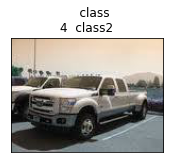

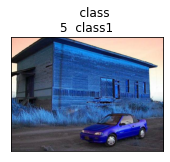

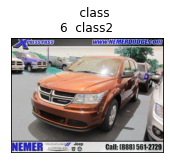

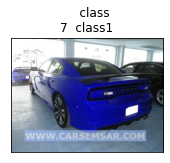

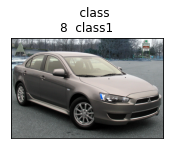

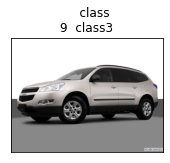

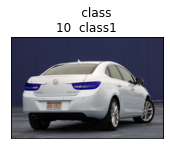

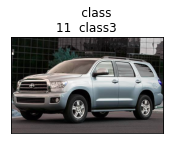

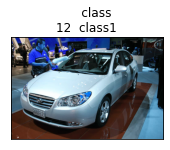

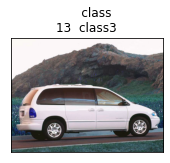

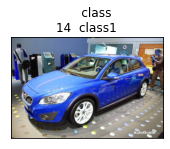

In [48]:
index = 0
for img in p3images:
    plt.subplot(121),plt.imshow(img,cmap = 'gray')
    plt.title(str(p3labels[index])), plt.xticks([]), plt.yticks([])
    index = index + 1

    plt.show()

In [ ]:
#challenges faced during task 3 - 
# I used a tool, labelImg to label all the images first, labelled data as - class1, class2 and class3, 
# stored the data into a csv and read that file
# in python to create dataset for images along with their classes.

# PART FIVE

To maintain and support the AIML image classifier after it is deployed in production, we would still have to keep the model updated so that it can process new data as well. For achieving this, we can retrain the model from time to time, by adding new data to the training dataset. This new data should contain both negative and postive output values, in order to avoid overfitting and underfitting. As, if we do not have neagtive data in the training dataset, it will only be trained based on the positive data and might not learn the features appropriately. Another strategy would be to introduce new features while training the model again. This will help in keeping it up to date with the new things that might affect the predictions, hence keeping it up to date with the latest sentiment of users in order to provide better predictions. For example, a face recognition model trained in, say, 2019 would only recognize the face after analysing all features of the face. But after 2020, the model should be retrained so that it can idebtify faces with masks as well. A different strategy would be to build a new model from time to time. It might take longer but it will help achieve better results.6+9+

9\777